In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('onestop_split.csv') 
df

,text,label
0,"﻿When you see the word Amazon, what’s the firs...",0
1,"Amazon has applied for many new domains, inclu...",0
2,"﻿To tourists, Amsterdam still seems very liber...",0
3,One Dutch newspaper wrote that in the 19th cen...,0
4,"﻿Anitta, a music star from Brazil, has million...",0
...,...,...
1129,"So far, the tournament has avoided the worst D...",2
1130,﻿It is not just the world’s biggest burger cha...,2
1131,"Yet, just as McDonald’s has been losing the cu...",2
1132,﻿More than one million British workers might b...,2


In [3]:
# import nltk
# nltk.download('stopwords')
# import nltk
# nltk.download('punkt')

In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import spacy
import numpy as np 

In [5]:
def syllable_count(word):
    count = 0
    vowels = "aeiouy"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if count == 0:
        count += 1
    return count

In [7]:
nlp = spacy.load("en_core_web_sm")
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

avg_sent_length_list = []
avg_word_length_list = []
type_token_ratio_list = []
nonstop_ratio_list = []
syllables_cnt_ratio_list = []
for row in df.iterrows(): 
    text = row[1]['text'].lower() 
    sents = sent_tokenize(text) 
    avg_sent_length = np.mean([len(tokenizer.tokenize(sent)) for sent in sents])
    tokens = tokenizer.tokenize(text) 
    avg_word_length = np.mean([len(token) for token in tokens])
    filtered_tokens = [token for token in tokens if (token not in stop_words)&(not token.isnumeric())]
    type_token_ratio = len(set(tokens))/len(tokens)
    nonstop_ratio = len(set(filtered_tokens))/len(set(tokens))
    
    syllables_cnt_ratio_list.append(np.sum([syllable_count(token) for token in tokens])/len(tokens))
    avg_sent_length_list.append(avg_sent_length) 
    avg_word_length_list.append(avg_word_length) 
    type_token_ratio_list.append(type_token_ratio) 
    nonstop_ratio_list.append(nonstop_ratio) 
df['avg_sent_length'] = avg_sent_length_list
df['avg_word_length'] = avg_word_length_list
df['type_token_ratio'] = type_token_ratio_list
df['nonstop_ratio'] = nonstop_ratio_list 
df['syllables_cnt_ratio'] = syllables_cnt_ratio_list
df


,text,label,avg_sent_length,avg_word_length,type_token_ratio,nonstop_ratio,syllables_cnt_ratio
0,"﻿When you see the word Amazon, what’s the firs...",0,24.875000,4.572864,0.618090,0.650407,1.572864
1,"Amazon has applied for many new domains, inclu...",0,18.833333,4.920354,0.592920,0.731343,1.738938
2,"﻿To tourists, Amsterdam still seems very liber...",0,21.571429,4.552980,0.549669,0.704819,1.483444
3,One Dutch newspaper wrote that in the 19th cen...,0,24.666667,4.547297,0.628378,0.655914,1.493243
4,"﻿Anitta, a music star from Brazil, has million...",0,21.363636,4.178723,0.587234,0.717391,1.365957
...,...,...,...,...,...,...,...
1129,"So far, the tournament has avoided the worst D...",2,19.550000,4.613811,0.608696,0.760504,1.501279
1130,﻿It is not just the world’s biggest burger cha...,2,21.800000,4.566972,0.566972,0.734628,1.537615
1131,"Yet, just as McDonald’s has been losing the cu...",2,24.789474,4.479830,0.588110,0.718412,1.488323
1132,﻿More than one million British workers might b...,2,39.083333,4.848614,0.535181,0.752988,1.584222


In [8]:
df.columns

Index(['text', 'label', 'avg_sent_length', 'avg_word_length',
       'type_token_ratio', 'nonstop_ratio', 'syllables_cnt_ratio'],
      dtype='object')

In [9]:
df['level'] = df['label'].apply(lambda x: ['ele','int','adv'][int(x)])
df

,text,label,avg_sent_length,avg_word_length,type_token_ratio,nonstop_ratio,syllables_cnt_ratio,level
0,"﻿When you see the word Amazon, what’s the firs...",0,24.875000,4.572864,0.618090,0.650407,1.572864,ele
1,"Amazon has applied for many new domains, inclu...",0,18.833333,4.920354,0.592920,0.731343,1.738938,ele
2,"﻿To tourists, Amsterdam still seems very liber...",0,21.571429,4.552980,0.549669,0.704819,1.483444,ele
3,One Dutch newspaper wrote that in the 19th cen...,0,24.666667,4.547297,0.628378,0.655914,1.493243,ele
4,"﻿Anitta, a music star from Brazil, has million...",0,21.363636,4.178723,0.587234,0.717391,1.365957,ele
...,...,...,...,...,...,...,...,...
1129,"So far, the tournament has avoided the worst D...",2,19.550000,4.613811,0.608696,0.760504,1.501279,adv
1130,﻿It is not just the world’s biggest burger cha...,2,21.800000,4.566972,0.566972,0.734628,1.537615,adv
1131,"Yet, just as McDonald’s has been losing the cu...",2,24.789474,4.479830,0.588110,0.718412,1.488323,adv
1132,﻿More than one million British workers might b...,2,39.083333,4.848614,0.535181,0.752988,1.584222,adv


In [10]:
ele_stat = df[df.label==0].describe()
ele_stat

,label,avg_sent_length,avg_word_length,type_token_ratio,nonstop_ratio,syllables_cnt_ratio
count,378.0,378.000000,378.000000,378.000000,378.000000,378.000000
mean,0.0,19.484026,4.455412,0.565865,0.675659,1.463772
std,0.0,3.773158,0.255302,0.050300,0.043484,0.088931
min,0.0,11.050000,3.764505,0.441088,0.535088,1.267442
25%,0.0,17.000000,4.265856,0.532775,0.648893,1.402987
50%,0.0,19.080128,4.449706,0.564894,0.680000,1.453410
75%,0.0,21.382576,4.601177,0.599573,0.704335,1.516355
max,0.0,40.571429,5.156134,0.715278,0.796992,1.741379


In [11]:
int_stat = df[df.label==1].describe()
int_stat

,label,avg_sent_length,avg_word_length,type_token_ratio,nonstop_ratio,syllables_cnt_ratio
count,378.0,378.000000,378.000000,378.000000,378.000000,378.000000
mean,1.0,20.838321,4.638302,0.573167,0.724058,1.526557
std,0.0,3.828008,0.252641,0.048280,0.035786,0.091417
min,1.0,12.368421,4.002392,0.434884,0.572581,1.320574
25%,1.0,18.321970,4.458590,0.540094,0.702128,1.461757
50%,1.0,20.605556,4.627188,0.572514,0.727273,1.519529
75%,1.0,23.083333,4.799536,0.606277,0.748394,1.582095
max,1.0,35.666667,5.401235,0.720339,0.816667,1.793201


In [12]:
adv_stat = df[df.label==2].describe()
adv_stat

,label,avg_sent_length,avg_word_length,type_token_ratio,nonstop_ratio,syllables_cnt_ratio
count,378.0,378.000000,378.000000,378.000000,378.000000,378.000000
mean,2.0,26.052050,4.646800,0.560054,0.735588,1.545297
std,0.0,5.755300,0.268879,0.044796,0.037319,0.095272
min,2.0,14.391304,3.927273,0.446078,0.605263,1.333333
25%,2.0,21.938636,4.441953,0.530647,0.713916,1.476648
50%,2.0,25.579832,4.645569,0.560899,0.736622,1.540815
75%,2.0,29.285714,4.842338,0.588544,0.762098,1.600070
max,2.0,54.400000,5.370518,0.683486,0.828996,1.816393


In [13]:
comp = pd.DataFrame(columns = ele_stat.columns).append(ele_stat.loc['50%'])
comp = comp.append(int_stat.loc['50%'])
comp = comp.append(adv_stat.loc['50%'])
comp.set_index('label')

,avg_sent_length,avg_word_length,type_token_ratio,nonstop_ratio,syllables_cnt_ratio
label,,,,,
0.0,19.080128,4.449706,0.564894,0.680000,1.453410
1.0,20.605556,4.627188,0.572514,0.727273,1.519529
2.0,25.579832,4.645569,0.560899,0.736622,1.540815


In [14]:
comp['level'] = ['Elementary', 'Intermediate','Advanced']

In [15]:
x = comp.copy()
x = x.T.reset_index()
x

,index,50%,50%,50%
0,label,0.0,1.0,2.0
1,avg_sent_length,19.080128,20.605556,25.579832
2,avg_word_length,4.449706,4.627188,4.645569
3,type_token_ratio,0.564894,0.572514,0.560899
4,nonstop_ratio,0.68,0.727273,0.736622
5,syllables_cnt_ratio,1.45341,1.519529,1.540815
6,level,Elementary,Intermediate,Advanced


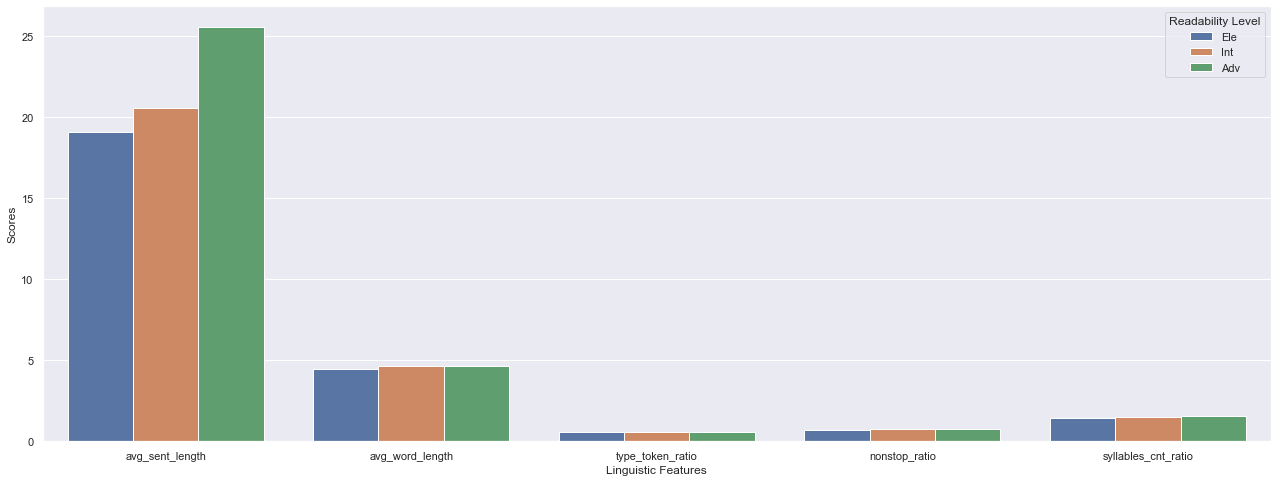

In [17]:
import seaborn as sns
x = comp.copy()
x = x.T.reset_index().drop(6,axis = 0).drop(0,axis = 0)
x.columns = ['Linguistic Features','Ele','Int','Adv'] 
x = x.melt('Linguistic Features', var_name='Readability Level',  value_name='Scores')
sns.set(rc = {'figure.figsize':(22,8)})
g = sns.barplot(x="Linguistic Features", y="Scores", hue='Readability Level', data=x)

In [19]:
y = df['level'] 
X = df[['avg_sent_length', 'avg_word_length',
       'type_token_ratio', 'nonstop_ratio','syllables_cnt_ratio']]
X,y

(      avg_sent_length  avg_word_length  type_token_ratio  nonstop_ratio  \
 0           24.875000         4.572864          0.618090       0.650407   
 1           18.833333         4.920354          0.592920       0.731343   
 2           21.571429         4.552980          0.549669       0.704819   
 3           24.666667         4.547297          0.628378       0.655914   
 4           21.363636         4.178723          0.587234       0.717391   
 ...               ...              ...               ...            ...   
 1129        19.550000         4.613811          0.608696       0.760504   
 1130        21.800000         4.566972          0.566972       0.734628   
 1131        24.789474         4.479830          0.588110       0.718412   
 1132        39.083333         4.848614          0.535181       0.752988   
 1133        35.500000         4.687324          0.526761       0.679144   
 
       syllables_cnt_ratio  
 0                1.572864  
 1                1.738938  

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
names = ["Dummy","Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    DummyClassifier(strategy="prior"),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    ]
results = pd.DataFrame() 
results['Classifiers'] = names 
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_scaled, y_train)
    # evaluate predictions
    accuracy = clf.score(X_test_scaled, y_test)
    scores.append(accuracy)
    print("%s Accuracy: %.2f%%" % (name,accuracy * 100.0))
results['Score'] = scores 
results

Dummy Accuracy: 29.07%
Nearest Neighbors Accuracy: 61.23%
Linear SVM Accuracy: 45.81%
RBF SVM Accuracy: 68.72%
Gaussian Process Accuracy: 68.72%
Decision Tree Accuracy: 59.03%
Random Forest Accuracy: 66.08%
Neural Net Accuracy: 68.28%
AdaBoost Accuracy: 66.08%
Naive Bayes Accuracy: 69.16%


,Classifiers,Score
0,Dummy,0.290749
1,Nearest Neighbors,0.612335
2,Linear SVM,0.458150
3,RBF SVM,0.687225
4,Gaussian Process,0.687225
5,Decision Tree,0.590308
6,Random Forest,0.660793
7,Neural Net,0.682819
8,AdaBoost,0.660793
9,Naive Bayes,0.691630


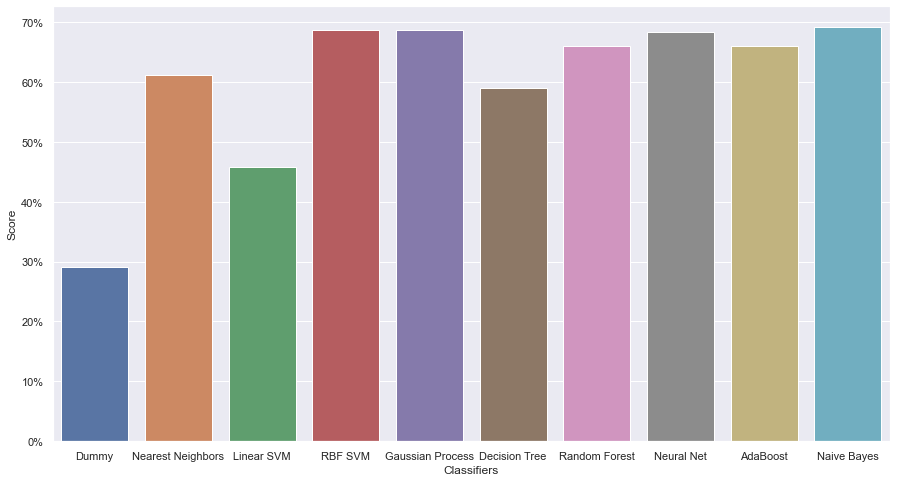

In [23]:
import seaborn as sns
from  matplotlib.ticker import PercentFormatter
sns.set(rc = {'figure.figsize':(15,8)})
g = sns.barplot(data = results, x = 'Classifiers', y = 'Score')
g.yaxis.set_major_formatter(PercentFormatter(1))
plt.show()